In [1]:
# Import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set_theme(style='dark')
sns.set_palette(palette='Set2')

# Run scripts for data and analysis
%run tidy_data.py
%run scripts.py

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 174 non-null    object  
 1   age                174 non-null    int64   
 2   variant_histology  174 non-null    category
 3   ypT_stage          174 non-null    category
 4   ypN_stage          174 non-null    category
 5   recurrence         173 non-null    category
 6   fu_recurrence      174 non-null    float64 
 7   dod                171 non-null    category
 8   doc                170 non-null    category
 9   fu_censor          174 non-null    float64 
 10  sex                174 non-null    object  
 11  year_cystectomy    173 non-null    float64 
 12  ypT_group          174 non-null    object  
 13  ypN_group          174 non-null    object  
 14  dre                174 non-null    category
 15  ypT_group1         174 non-null    category
 16  ypT_grou

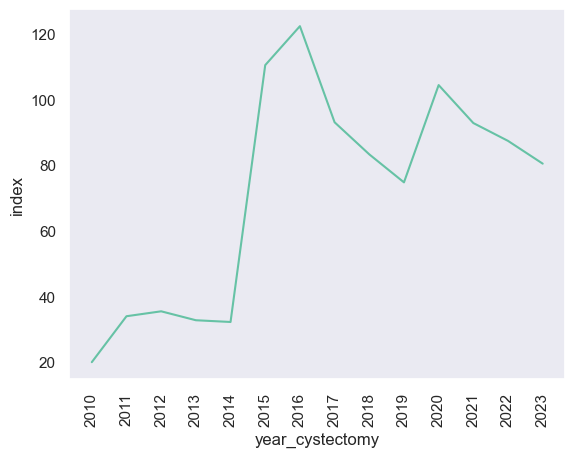

In [2]:
# Reset the index to make it a column
df_reset = df.reset_index()

# Now plot with 'index' as a column
sns.lineplot(data=df_reset, y='index', x='year_cystectomy', ci=None)
plt.xticks(range(2010, 2024), rotation=90)
plt.show()


# Analysis using median

In [3]:
df['year_cystectomy_q2'] = pd.qcut(df['year_cystectomy'], q=2, labels=['Q1 Years', 'Q2 Years'])
df['year_cystectomy_q2'].value_counts(sort=False)

year_cystectomy_q2
Q1 Years    97
Q2 Years    76
Name: count, dtype: int64

## Tumor recurrence

In [4]:
pd.crosstab(df['year_cystectomy_q2'], df['recurrence'], normalize='index').round(2)

recurrence,No,Yes
year_cystectomy_q2,,
Q1 Years,0.68,0.32
Q2 Years,0.67,0.33


In [5]:
stats.chi2_contingency(pd.crosstab(df['year_cystectomy_q2'], df['recurrence']))

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[64.74418605, 31.25581395],
       [51.25581395, 24.74418605]]))

In [6]:
cramers_v(df['year_cystectomy_q2'], df['recurrence'])

0.0

## Death by cancer

In [7]:
pd.crosstab(df['year_cystectomy_q2'], df['dod'], normalize='index').round(2)

dod,No,Yes
year_cystectomy_q2,,
Q1 Years,0.74,0.26
Q2 Years,0.79,0.21


In [8]:
stats.chi2_contingency(pd.crosstab(df['year_cystectomy_q2'], df['dod']))

Chi2ContingencyResult(statistic=0.25272014170040474, pvalue=0.6151662213418985, dof=1, expected_freq=array([[71.88235294, 22.11764706],
       [58.11764706, 17.88235294]]))

In [9]:
cramers_v(df['year_cystectomy_q2'], df['dod'])

0.0

## Death by other causes

In [10]:
pd.crosstab(df['year_cystectomy_q2'], df['doc'], normalize='index').round(2)

doc,No,Yes
year_cystectomy_q2,,
Q1 Years,0.88,0.12
Q2 Years,0.91,0.09


In [11]:
stats.chi2_contingency(pd.crosstab(df['year_cystectomy_q2'], df['doc']))

Chi2ContingencyResult(statistic=0.08885315122349802, pvalue=0.7656402305162703, dof=1, expected_freq=array([[83.09467456,  9.90532544],
       [67.90532544,  8.09467456]]))

In [12]:
cramers_v(df['year_cystectomy_q2'], df['doc'])

0.0

## Disease-related event

In [13]:
pd.crosstab(df['year_cystectomy_q2'], df['dre'], normalize='index').round(2)

dre,No,Yes
year_cystectomy_q2,,
Q1 Years,0.57,0.43
Q2 Years,0.62,0.38


In [14]:
stats.chi2_contingency(pd.crosstab(df['year_cystectomy_q2'], df['dre']))

Chi2ContingencyResult(statistic=0.27723879141883917, pvalue=0.5985167482325713, dof=1, expected_freq=array([[57.19075145, 39.80924855],
       [44.80924855, 31.19075145]]))

In [15]:
cramers_v(df['year_cystectomy_q2'], df['dre'])

0.0

# Analysis using tertiles

In [16]:
df['year_cystectomy_q3'] = pd.qcut(df['year_cystectomy'], q=3, labels=['Q1 Years', 'Q2 Years', 'Q3 Years'])

In [17]:
df['year_cystectomy_q3'].value_counts(sort=False)

year_cystectomy_q3
Q1 Years    70
Q2 Years    52
Q3 Years    51
Name: count, dtype: int64

## Tumor recurrence

In [18]:
pd.crosstab(df['year_cystectomy_q3'], df['recurrence'], normalize='index').round(2)

recurrence,No,Yes
year_cystectomy_q3,,
Q1 Years,0.70,0.30
Q2 Years,0.60,0.40
Q3 Years,0.73,0.27


In [19]:
stats.chi2_contingency(pd.crosstab(df['year_cystectomy_q3'], df['recurrence']))

Chi2ContingencyResult(statistic=2.198090717084895, pvalue=0.3331890079622949, dof=2, expected_freq=array([[46.53488372, 22.46511628],
       [35.06976744, 16.93023256],
       [34.39534884, 16.60465116]]))

In [20]:
cramers_v(df['year_cystectomy_q3'], df['recurrence'])

0.03

## Death by cancer

In [21]:
pd.crosstab(df['year_cystectomy_q3'], df['dod'], normalize='index').round(2)

dod,No,Yes
year_cystectomy_q3,,
Q1 Years,0.74,0.26
Q2 Years,0.68,0.32
Q3 Years,0.88,0.12


In [22]:
stats.chi2_contingency(pd.crosstab(df['year_cystectomy_q3'], df['dod']))

Chi2ContingencyResult(statistic=6.167759197324414, pvalue=0.045781298604536315, dof=2, expected_freq=array([[52.76470588, 16.23529412],
       [38.23529412, 11.76470588],
       [39.        , 12.        ]]))

In [23]:
cramers_v(df['year_cystectomy_q3'], df['dod'])

0.16

## Death by other causes

In [24]:
pd.crosstab(df['year_cystectomy_q3'], df['doc'], normalize='index').round(2)

doc,No,Yes
year_cystectomy_q3,,
Q1 Years,0.87,0.13
Q2 Years,0.94,0.06
Q3 Years,0.88,0.12


In [25]:
stats.chi2_contingency(pd.crosstab(df['year_cystectomy_q3'], df['doc']))

Chi2ContingencyResult(statistic=1.5374298294036879, pvalue=0.4636084620821215, dof=2, expected_freq=array([[61.65088757,  7.34911243],
       [43.78106509,  5.21893491],
       [45.56804734,  5.43195266]]))

In [26]:
cramers_v(df['year_cystectomy_q3'], df['doc'])

0.0

## Disease-related event

In [27]:
pd.crosstab(df['year_cystectomy_q3'], df['dre'], normalize='index').round(2)

dre,No,Yes
year_cystectomy_q3,,
Q1 Years,0.59,0.41
Q2 Years,0.52,0.48
Q3 Years,0.67,0.33


In [28]:
stats.chi2_contingency(pd.crosstab(df['year_cystectomy_q3'], df['dre']))

Chi2ContingencyResult(statistic=2.32032332253956, pvalue=0.31343550640470585, dof=2, expected_freq=array([[41.2716763 , 28.7283237 ],
       [30.65895954, 21.34104046],
       [30.06936416, 20.93063584]]))

In [29]:
cramers_v(df['year_cystectomy_q3'], df['dre'])

0.04

# Analysis using quartiles

In [30]:
df['year_cystectomy_q4'] = pd.qcut(df['year_cystectomy'], q=4, labels=['Q1 Years', 'Q2 Years', 'Q3 Years', 'Q4 Years'])
df['year_cystectomy_q4'].value_counts(sort=False)

year_cystectomy_q4
Q1 Years    52
Q2 Years    45
Q3 Years    34
Q4 Years    42
Name: count, dtype: int64

## Tumor recurrence

In [31]:
pd.crosstab(df['year_cystectomy_q4'], df['recurrence'], normalize='index').round(2)

recurrence,No,Yes
year_cystectomy_q4,,
Q1 Years,0.71,0.29
Q2 Years,0.64,0.36
Q3 Years,0.59,0.41
Q4 Years,0.74,0.26


In [32]:
stats.chi2_contingency(pd.crosstab(df['year_cystectomy_q4'], df['recurrence']))

Chi2ContingencyResult(statistic=2.5421701475381573, pvalue=0.46771817560411455, dof=3, expected_freq=array([[35.06976744, 16.93023256],
       [29.6744186 , 14.3255814 ],
       [22.93023256, 11.06976744],
       [28.3255814 , 13.6744186 ]]))

In [33]:
cramers_v(df['year_cystectomy_q4'], df['recurrence'])

0.0

## Death by cancer

In [34]:
pd.crosstab(df['year_cystectomy_q4'], df['dod'], normalize='index').round(2)

dod,No,Yes
year_cystectomy_q4,,
Q1 Years,0.75,0.25
Q2 Years,0.74,0.26
Q3 Years,0.65,0.35
Q4 Years,0.90,0.10


In [35]:
stats.chi2_contingency(pd.crosstab(df['year_cystectomy_q4'], df['dod']))

Chi2ContingencyResult(statistic=7.421932234432235, pvalue=0.05959864296916729, dof=3, expected_freq=array([[39.76470588, 12.23529412],
       [32.11764706,  9.88235294],
       [26.        ,  8.        ],
       [32.11764706,  9.88235294]]))

In [36]:
cramers_v(df['year_cystectomy_q4'], df['dod'])

0.16

## Death by other causes

In [37]:
pd.crosstab(df['year_cystectomy_q4'], df['doc'], normalize='index').round(2)

doc,No,Yes
year_cystectomy_q4,,
Q1 Years,0.85,0.15
Q2 Years,0.93,0.07
Q3 Years,0.94,0.06
Q4 Years,0.88,0.12


In [38]:
stats.chi2_contingency(pd.crosstab(df['year_cystectomy_q4'], df['doc']))

Chi2ContingencyResult(statistic=2.585062799864647, pvalue=0.46011425078830304, dof=3, expected_freq=array([[46.46153846,  5.53846154],
       [36.63313609,  4.36686391],
       [30.37869822,  3.62130178],
       [37.52662722,  4.47337278]]))

In [39]:
cramers_v(df['year_cystectomy_q4'], df['doc'])

0.0

## Disease-related event

In [40]:
pd.crosstab(df['year_cystectomy_q4'], df['dre'], normalize='index').round(2)

dre,No,Yes
year_cystectomy_q4,,
Q1 Years,0.60,0.40
Q2 Years,0.53,0.47
Q3 Years,0.56,0.44
Q4 Years,0.67,0.33


In [41]:
stats.chi2_contingency(pd.crosstab(df['year_cystectomy_q4'], df['dre']))

Chi2ContingencyResult(statistic=1.761995001089255, pvalue=0.6232399597121985, dof=3, expected_freq=array([[30.65895954, 21.34104046],
       [26.53179191, 18.46820809],
       [20.04624277, 13.95375723],
       [24.76300578, 17.23699422]]))

In [42]:
cramers_v(df['year_cystectomy_q4'], df['dre'])

0.0